In [218]:
#Import the libraries

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
#Read and store a csv file into the dataframe
Islington_data = pd.read_csv('Islington_iwork_anonymous_data.csv',sep=',')

#Display the first five rows of the dataframe
Islington_data.head()

,Employer,Registration_Date,Client_Current_Age,Parent_on_Enrolment,Gender,Ethnic_Origin,Has_Disability,Disability_details,Religion,Sexuality,Highest_Level_of_Education,Claiming_Benefits,Benefits,WARD_NAME
0,No Outcome,22/07/2021,29,Blanks,Female,(C) Asian or Asian British - Any other Asian b...,No,NaN,Blanks,Prefer not to say sexuality,ISCED Level 6 (Bachelor's or equivalent level),No,Not in receipt of benefits,Whitechapel
1,No Outcome,24/08/2021,32,Blanks,Male,(C) Asian or Asian British - Any other Asian b...,No,NaN,Blanks,Prefer not to say sexuality,ISCED Level 6 (Bachelor's or equivalent level),No,Not in receipt of benefits,Stepney Green
2,No Outcome,13/05/2021,48,Blanks,Female,(D) Black or Black British - Other African,Blanks,NaN,Christian,Heterosexual,Blanks,Blanks,NaN,Forest
3,No Outcome,31/08/2021,55,Blanks,Male,(D) Black or Black British - Any other Black b...,No,NaN,Blanks,No response to sexuality,ISCED Level 7 (Master's or equivalent level),Yes,NaN,NaN
4,No Outcome,31/08/2021,30,Blanks,Female,(A) White - Any other White background,No,NaN,Blanks,No response to sexuality,ISCED Level 2 (Lower secondary education),Yes,Prefer not to disclose benefits,Blackwall & Cubitt Town


In [220]:
#To print the shape of the table
print("number of rows in the data is", len(Islington_data))
print("number of columns in the data is", len(Islington_data.columns))

number of rows in the data is 4788
number of columns in the data is 14


### Checking  missing or error data of each variable

In [221]:
#For missing values
for i in Islington_data.columns:
    print(f"The number of missing values in {i} is {Islington_data[i].isna().sum()}")

The number of missing values in Employer is 1
The number of missing values in Registration_Date is 0
The number of missing values in Client_Current_Age is 0
The number of missing values in Parent_on_Enrolment is 0
The number of missing values in Gender is 0
The number of missing values in Ethnic_Origin is 0
The number of missing values in Has_Disability is 0
The number of missing values in Disability_details is 4788
The number of missing values in Religion is 0
The number of missing values in Sexuality is 0
The number of missing values in Highest_Level_of_Education is 0
The number of missing values in Claiming_Benefits is 0
The number of missing values in Benefits is 2507
The number of missing values in WARD_NAME is 7


### Removing the variables with no influences on the target

In [222]:
#Since the column disability details doesn't have any 
#relevant data, we can remove the column

In [223]:
#We can remove the registration data, as we don't have the exact hiring dates, which would have been helpful in determining
#the days it took to get the job.

In [224]:
Islington_data['Sexuality'].value_counts()
#Since most of the person appears to be Hetrosexual, this variable cannot be considered as a fit to predict
#the target variable as it may serve as a bias.

Heterosexual                   3592
Prefer not to say sexuality     552
No response to sexuality        198
Blanks                          195
Gay / lesbian                   125
Bisexual                        107
Other sexuality                  19
Name: Sexuality, dtype: int64

In [225]:
#Benefits can be removed as there are 2507 missing values in it. If we remove all the rows 
#corresponding to the null value, we will lose majority of the data

In [226]:
# Remove the irrelevant columns
Islington_data=Islington_data.drop(['Disability_details', 'Registration_Date',\
               'Sexuality','Benefits'], axis = 1)
Islington_data.head()

,Employer,Client_Current_Age,Parent_on_Enrolment,Gender,Ethnic_Origin,Has_Disability,Religion,Highest_Level_of_Education,Claiming_Benefits,WARD_NAME
0,No Outcome,29,Blanks,Female,(C) Asian or Asian British - Any other Asian b...,No,Blanks,ISCED Level 6 (Bachelor's or equivalent level),No,Whitechapel
1,No Outcome,32,Blanks,Male,(C) Asian or Asian British - Any other Asian b...,No,Blanks,ISCED Level 6 (Bachelor's or equivalent level),No,Stepney Green
2,No Outcome,48,Blanks,Female,(D) Black or Black British - Other African,Blanks,Christian,Blanks,Blanks,Forest
3,No Outcome,55,Blanks,Male,(D) Black or Black British - Any other Black b...,No,Blanks,ISCED Level 7 (Master's or equivalent level),Yes,NaN
4,No Outcome,30,Blanks,Female,(A) White - Any other White background,No,Blanks,ISCED Level 2 (Lower secondary education),Yes,Blackwall & Cubitt Town


### Cleaning the data

In [227]:
#Removing the rows with null values
Islington_data=Islington_data.dropna()

### Transforming the variables

In [228]:
#To check the number of unique values in Employer
Islington_data['Employer'].value_counts()

No Outcome                      4179
London Borough of Islington       58
Mihomecare- Islington Branch      41
Caterlink                         32
Islington Council                 25
                                ... 
dcs ltd                            1
Highbury Community Nursery         1
K&M                                1
Bespoke Solutions                  1
Dans Le Noir                       1
Name: Employer, Length: 281, dtype: int64

In [229]:
#Transform the variable Employer

Islington_data['Employer']=Islington_data['Employer'].apply(lambda x: 0 if x == 'No Outcome' else 1)
Islington_data['Employer'].value_counts()

0    4179
1     601
Name: Employer, dtype: int64

In [230]:
Islington_data['Gender'].value_counts()

Female               2937
Male                 1784
Prefer not to say      33
Not Known              14
No response             6
Transgender             6
Name: Gender, dtype: int64

In [231]:
#Transform the variable Gender

Islington_data['Gender']=Islington_data['Gender'].apply(lambda x: 0 if x=='Female' else 1 if x== 'Male' else 2 if x=='Transgender'\
                                                else 3 if x=='Prefer not to say' else 4)
Islington_data['Gender'].value_counts()

0    2937
1    1784
3      33
4      20
2       6
Name: Gender, dtype: int64

In [232]:
Islington_data['Ethnic_Origin'].value_counts()

(A) White - British                                        1130
(A) White - Any other White background                      594
(D) Black or Black British - Caribbean                      450
(D) Black or Black British - Other African                  340
(C) Asian or Asian British - Bangladeshi                    202
(D) Black or Black British - Somali                         197
(B) Mixed - White and Black Caribbean                       158
(E) Other Ethnic Groups - Prefer not to say                 143
(D) Black or Black British - Any other Black background     138
(B) Mixed - Any other Mixed background                      138
(C) Asian or Asian British - Any other Asian background     129
(D) Black or Black British - Nigerian                       126
(D) Black or Black British - Eritrean                       120
(A) White - Turkish/ Turkish Cypriot                        112
(E) Other Ethnic Groups - Any other background              109
(A) White - Irish                       

In [233]:
#getting unique values and the ordinal values
values = Islington_data['Ethnic_Origin'].value_counts().keys().tolist()
indx=range(len(values))
valdict=dict(zip(values,indx))

In [234]:
#Transform the variable Ethnic Origin
        
Islington_data['Ethnic_Origin']=Islington_data['Ethnic_Origin'].apply(lambda x: valdict[x])

In [235]:
Islington_data['WARD_NAME'].value_counts(ascending=True)

South Acton          1
Enfield Highway      1
Southbury            1
Norbiton             1
River                1
                  ... 
Tollington         284
Caledonian         293
Highbury West      323
Holloway           347
Finsbury Park      385
Name: WARD_NAME, Length: 205, dtype: int64

In [236]:
#getting unique values sorted in ascending order and the ordinal values
values2 = Islington_data['WARD_NAME'].value_counts(ascending=True).keys().tolist()
indx2=range(len(values2))
valdict2=dict(zip(values2,indx2))

In [237]:
#Transform the variable WARD_NAME

Islington_data['WARD_NAME']=Islington_data['WARD_NAME'].apply(lambda x: valdict2[x])

In [238]:
Islington_data['Highest_Level_of_Education'].sort_values().value_counts()

Blanks                                                        2680
ISCED Level 2 (Lower secondary education)                      632
ISCED Level 3 (Upper secondary education)                      463
ISCED Level 6 (Bachelor's or equivalent level)                 390
ISCED Level 4 (Post secondary - tertiary and non-tertiary)     183
ISCED Level 1 (Primary education)                              173
ISCED Level 7 (Master's or equivalent level)                   105
ISCED Level 5 (Short cycle tertiary education)                  96
ISCED Level 0 (Early childhood education)                       49
ISCED Level 8 (Doctoral or equivalenmt level)                    9
Name: Highest_Level_of_Education, dtype: int64

In [239]:
#Transform the variable Highest_Level_of_Education

Islington_data['Highest_Level_of_Education']=Islington_data['Highest_Level_of_Education'].apply(lambda x: \
                                                      1 if x.startswith('ISCED Level 8')\
                                                      else 2 if x.startswith('ISCED Level 7')\
                                                      else 3 if x.startswith('ISCED Level 6')\
                                                      else 4 if x.startswith('ISCED Level 5')\
                                                      else 5 if x.startswith('ISCED Level 4')\
                                                      else 6 if x.startswith('ISCED Level 3')\
                                                      else 7 if x.startswith('ISCED Level 2')\
                                                      else 8 if x.startswith('ISCED Level 1')\
                                                      else 9 if x.startswith('ISCED Level 0') else 0)
                                                                                                
Islington_data['Highest_Level_of_Education'].value_counts()                                                                                               

0    2680
7     632
6     463
3     390
5     183
8     173
2     105
4      96
9      49
1       9
Name: Highest_Level_of_Education, dtype: int64

In [240]:
Islington_data['Claiming_Benefits'].value_counts()

Blanks    2647
Yes       1324
No         809
Name: Claiming_Benefits, dtype: int64

In [241]:
#Transform the variable Claiming_Benefits

Islington_data['Claiming_Benefits']=Islington_data['Claiming_Benefits'].apply(lambda x: 0 if x=='No' \
                                                                              else 1 if x=='Yes' else 2)
Islington_data['Claiming_Benefits'].value_counts()


2    2647
1    1324
0     809
Name: Claiming_Benefits, dtype: int64

In [242]:
Islington_data.head()

,Employer,Client_Current_Age,Parent_on_Enrolment,Gender,Ethnic_Origin,Has_Disability,Religion,Highest_Level_of_Education,Claiming_Benefits,WARD_NAME
0,0,29,Blanks,0,10,No,Blanks,3,0,100
1,0,32,Blanks,1,10,No,Blanks,3,0,120
2,0,48,Blanks,0,3,Blanks,Christian,0,2,117
4,0,30,Blanks,0,1,No,Blanks,7,1,119
5,0,57,Blanks,1,0,No,Blanks,3,1,109


In [243]:
#Removing all the other columns without ordinal values
Islington_data_new=Islington_data.drop(['Parent_on_Enrolment', 'Has_Disability',\
               'Religion'], axis = 1)

In [244]:
Islington_data_new.head()

,Employer,Client_Current_Age,Gender,Ethnic_Origin,Highest_Level_of_Education,Claiming_Benefits,WARD_NAME
0,0,29,0,10,3,0,100
1,0,32,1,10,3,0,120
2,0,48,0,3,0,2,117
4,0,30,0,1,7,1,119
5,0,57,1,0,3,1,109


In [245]:
summary=Islington_data_new['Client_Current_Age'].describe()
summary.loc['skewness'] = Islington_data_new['Client_Current_Age'].skew().tolist()
summary.loc['kurtosis'] = Islington_data_new['Client_Current_Age'].kurtosis().tolist()
summary

count       4780.000000
mean          37.321130
std           14.083748
min            0.000000
25%           26.000000
50%           36.000000
75%           47.000000
max          137.000000
skewness       0.905882
kurtosis       3.205191
Name: Client_Current_Age, dtype: float64

In [246]:
#Find correlation matrix
corr_matrix = Islington_data_new.corr()

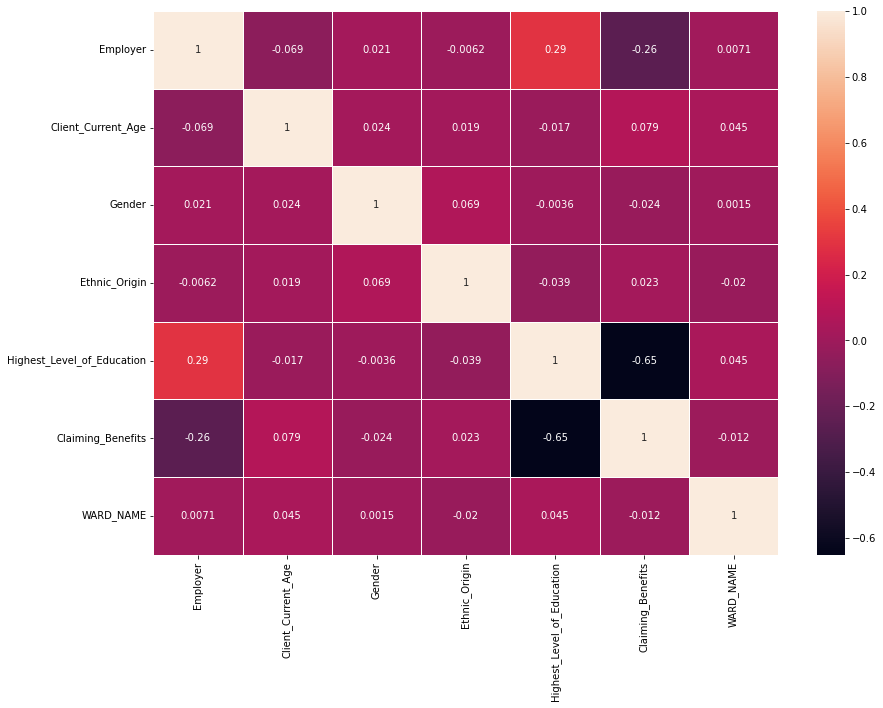

In [247]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax);

In [249]:
#correlation of target variable with other variables
corr_matrix[:1].unstack().sort_values(ascending = False)[1:]

Highest_Level_of_Education  Employer    0.293205
Gender                      Employer    0.021403
WARD_NAME                   Employer    0.007149
Ethnic_Origin               Employer   -0.006238
Client_Current_Age          Employer   -0.069318
Claiming_Benefits           Employer   -0.261334
dtype: float64

Enter the variable to show the histogram:Ethnic_Origin


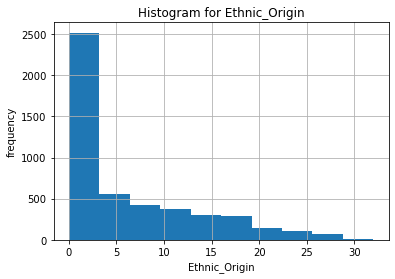

Enter the variable to show the histogram:
You entered blank


In [250]:
while True:
    #convert user-input it into a string and store in variable
    variable = str(input("Enter the variable to show the histogram:"))
    #remove any spaces at the extreme ends of the input
    variable=variable.strip()
    #Stop if no input is given
    if variable == '':
        print("You entered blank")
        break
    else:
        #plot the histogram for the input
        df=Islington_data_new[variable]
        ax = df.hist(figsize=(6,4))
        plt.title(f"Histogram for {variable}")
        plt.xlabel(f"{variable}")
        plt.ylabel("frequency")
        plt.show()
        continue

Enter the first variable to show the scatter plot 
WARD_NAME
Enter the second variable to show the scatter plot 
Highest_Level_of_Education


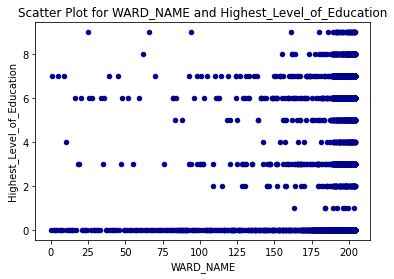

Enter the first variable to show the scatter plot 

The first variable was empty


In [251]:
while True:
    #convert user-input it into a string and store in variable
    x= str(input("Enter the first variable to show the scatter plot \n"))
    #remove any spaces at the extreme ends of the input
    x=x.strip()
    #Stop if no input is given
    if x=='':
        print("The first variable was empty")
        break
    #convert user-input it into a string and store in variable
    y=str(input("Enter the second variable to show the scatter plot \n"))
    #remove any spaces at the extreme ends of the input
    y=y.strip()
    #Stop if no input is given
    if y == '':
        print("Cannot plot a scatter diagram as the second variable was not given")
        break
    else:
        #plot the scatter plot for the input variables
        ax = Islington_data_new.plot.scatter(x=x,y=y, c='DarkBlue')
        plt.title(f"Scatter Plot for {x} and {y}")
        plt.xlabel(f"{x}")
        plt.ylabel(f"{y}")
        plt.show()
        continue

In [252]:
from sklearn.preprocessing import StandardScaler

#Defining X as the explanatory variables and Y as target variable
X=Islington_data_new.drop(columns=['Employer'])
Y=Islington_data_new['Employer']

scaler = StandardScaler()

#Standardise X such that mean=0 and variance=1
X = scaler.fit_transform(X)

#Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [253]:
#import KNeighborsClassifier and accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#To initiate the classifier
model_KN = KNeighborsClassifier()

# fit classifier to training set
model_KN.fit(X_train,y_train)

#predict the values of testing data
predictions = model_KN.predict(X_test)

In [254]:
from sklearn.metrics import confusion_matrix

#To find and assign the True Positives, True Negatives, False Positives and False Negatives
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

#To print the values
print('True Positives:', TP)
print('False Positives:', FP)
print('True Negatives:', TN)
print('False Negatives:', FN)

True Positives: 40
False Positives: 55
True Negatives: 1203
False Negatives: 136


In [255]:
#To compute and print the accuracy rate for training data
print('Training set score: {:.4f}'.format(model_KN.score(X_train, y_train)*100))

#To compute and print the accuracy rate for testing data
print('Test set score: {:.4f}'.format(model_KN.score(X_test, y_test)*100))

Training set score: 89.0915
Test set score: 86.6806


In [ ]:
#Since the accuracy scores are comparable, we can say that there is no overfitting

In [256]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#To initiate the classifier
model_RF = RandomForestClassifier()

# fit classifier to training set
model_RF.fit(X_train, y_train)

#predict the values of testing data
predictions = model_RF.predict(X_test)

In [257]:
#To find and assign the True Positives, True Negatives, False Positives and False Negatives
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

#printing the values of TP, TN, FP & FN
print('True Positives:', TP)
print('False Positives:', FP)
print('True Negatives:', TN)
print('False Negatives:', FN)

True Positives: 48
False Positives: 26
True Negatives: 1232
False Negatives: 128


In [258]:
#To compute and print the accuracy rate for training data
print('Training set score: {:.4f}'.format(model_RF.score(X_train, y_train)*100))

#To compute and print the accuracy rate for testing data
print('Test set score: {:.4f}'.format(model_RF.score(X_test, y_test)*100))

Training set score: 99.7609
Test set score: 89.2608
